In [65]:
## encoding: utf-8
import pickle


with open("./fonts.dat", 'rb') as f:
    ind = pickle.load(f, encoding = 'bytes')  
    print(ind)
X = ind[b"data"] 
##X = X.reshape(-1,1,48,48)
X = X.reshape(-1, X.shape[1] * X.shape[2]) 

print(X)
Y = ind[b"target"] 
print(Y)
fonts_name = ind[b"letter"] 
print(fonts_name)

{b'data': array([[[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       ..., 
       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ..., 

In [32]:
X.shape

(1180, 2304)

In [33]:
Y.shape  

(1180,)

In [67]:
import numpy as np
import matplotlib.pyplot as plt 
from common.functions import *

from sklearn import preprocessing
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


x_train, x_test, y_train_label, y_test_label = train_test_split(X, Y, test_size=0.20) 
x_train = x_train.astype(np.float32) 
##x_test = preprocessing.normalize(x_test) 
x_test = x_test.astype(np.float32) 
##x_test = preprocessing.normalize(x_test) 
print(x_train) 
print(x_test) 

y_train = preprocessing.LabelBinarizer().fit_transform(y_train_label)
y_test = preprocessing.LabelBinarizer().fit_transform(y_test_label) 
print(x_train.shape)
print(y_train) 
print(y_test) 
print(y_train.shape)

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
(944, 2304)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
(944, 48)


472.0
epoch:0, train acc:0.0233050847458, test acc:0.0127118644068, elapsed:0.02716207504272461[sec]
epoch:1, train acc:0.0254237288136, test acc:0.00423728813559, elapsed:0.02215099334716797[sec]
epoch:2, train acc:0.0455508474576, test acc:0.0423728813559, elapsed:0.026228904724121094[sec]
epoch:3, train acc:0.0455508474576, test acc:0.0127118644068, elapsed:0.021975994110107422[sec]
epoch:4, train acc:0.0254237288136, test acc:0.00423728813559, elapsed:0.020495891571044922[sec]
epoch:5, train acc:0.0222457627119, test acc:0.0169491525424, elapsed:0.021385908126831055[sec]
epoch:6, train acc:0.0444915254237, test acc:0.0381355932203, elapsed:0.021019935607910156[sec]
epoch:7, train acc:0.0625, test acc:0.0338983050847, elapsed:0.02534198760986328[sec]
epoch:8, train acc:0.120762711864, test acc:0.0889830508475, elapsed:0.02031397819519043[sec]
epoch:9, train acc:0.165254237288, test acc:0.118644067797, elapsed:0.020859956741333008[sec]
epoch:10, train acc:0.166313559322, test acc:0.1

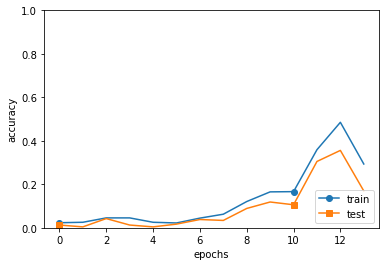

In [68]:
import time
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import * 

weight_decay_lambda = 0 
network = MultiLayerNetExtend(input_size=2304, hidden_size_list=[100, 100], output_size=48,
                        activation = "sigmoid",weight_decay_lambda = weight_decay_lambda)
optimizer = Momentum(lr=0.0045)  

max_epochs = 14
train_size = x_train.shape[0] 
batch_size = 2

train_loss_list = []
train_acc_list = []
test_acc_list = [] 

iter_per_epoch = max(train_size / batch_size, 1)  
print(iter_per_epoch)

epoch_cnt = 0 

for i in range(100000):
    start = time.time()
    batch_mask = np.random.choice(train_size, batch_size) 
    x_batch = x_train[batch_mask] 
    y_batch = y_train[batch_mask]
    
    grads = network.gradient(x_batch, y_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc) 
        end = time.time() - start

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + ", elapsed:{}".format(end) + "[sec]")


        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break 


markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()     


val acc:0.0661764705882 | lr:0.0015738890292043013, weight decay:1.3476001772763312e-05
val acc:0.0294117647059 | lr:0.0030168216044494235, weight decay:3.362844802017743e-07
val acc:0.0367647058824 | lr:2.495594041904265e-06, weight decay:6.867446992152853e-08
val acc:0.0 | lr:0.0002923350069879993, weight decay:1.738996523568113e-05
val acc:0.0147058823529 | lr:1.437331243441881e-05, weight decay:2.191082940434297e-06
val acc:0.0147058823529 | lr:0.003942939839475663, weight decay:3.949986498111812e-07
val acc:0.0147058823529 | lr:0.004275062745819658, weight decay:2.962564111875712e-08
val acc:0.0 | lr:5.572814779120848e-05, weight decay:1.0835999759407789e-05
val acc:0.00735294117647 | lr:4.576395059700132e-06, weight decay:1.3594782522109195e-07
val acc:0.00735294117647 | lr:0.0007772378982621746, weight decay:7.262191507000238e-06
val acc:0.0220588235294 | lr:0.0006976175001938062, weight decay:6.516382812473529e-08
val acc:0.0588235294118 | lr:0.0006376154201668761, weight decay

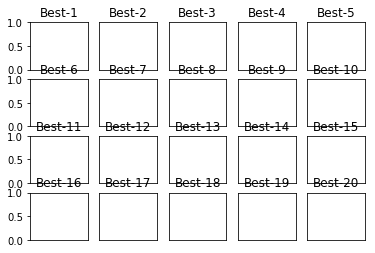

In [41]:
# coding: utf-8 
    
    
## cross-validation 
  
import sys, os
sys.path.append(os.pardir) 
import numpy as np
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer 

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, y_train = shuffle_dataset(x_train,y_train)
x_val = x_train[:validation_num]
y_val = y_train[:validation_num]
x_train = x_train[validation_num:]
y_train = y_train[validation_num:] 

def __train(lr, weight_decay, epocs=30):
    network = MultiLayerNet(input_size=2304, hidden_size_list=[100,100,100],
                            output_size=48, activation = "relu",weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, y_train, x_val, y_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='adam', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


optimization_trial = 50
results_val = {}
results_train = {}  
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()






In [25]:
## CNN 

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from common.trainer import Trainer



# 処理に時間のかかる場合はデータを削減 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,48,48), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, y_train, x_test, y_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (100,) (100,48) 